In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_regression

In [4]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,random_state=13,n_targets=1,noise=80)

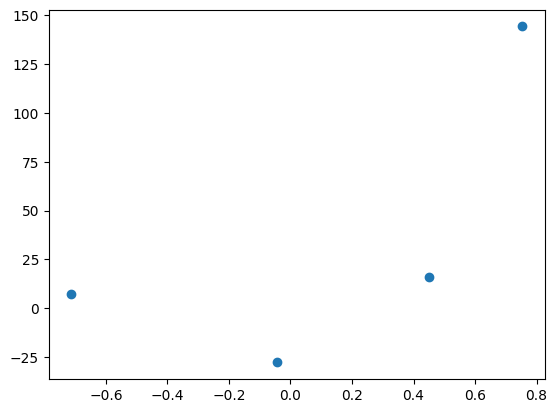

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [7]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [9]:
reg=LinearRegression()

In [10]:
reg.fit(x,y)

LinearRegression()

In [11]:
y_pred=reg.predict(x)

In [12]:
reg.coef_

array([78.35063668])

In [13]:
reg.intercept_

np.float64(26.15963284313262)

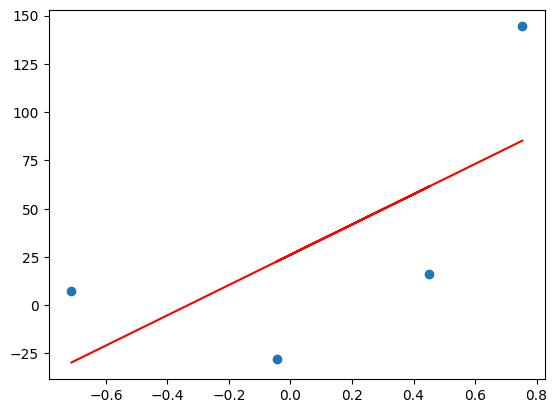

In [14]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')

In [16]:

# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * x) + 100).reshape(4)

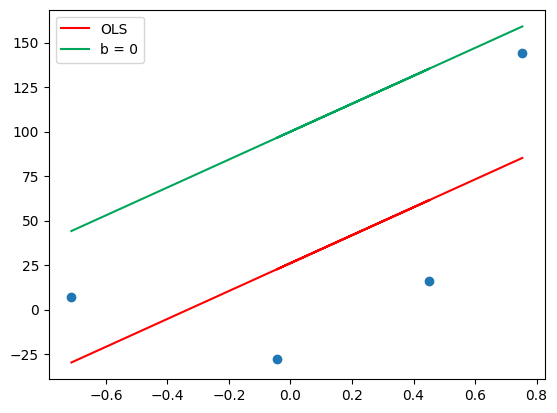

In [19]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

gradient descent is a technique to find the optimal solution

there are ** y=mx+b (2d)**

line is depend on m,b

suppose m is constant

 **bnew=bold-learning_rate * slope**

learning rate ==0.01 genrally it varies

slope of loss function at b L== d/db sum of (yi-y_hat)^2 # y_hat=mx+b

== -2* sum of i=1 to n (yi-mxi-b)


step_size=learning_rate*slope


steps:

iteration 1

m=78.35
b=0

1.  find the loss_slope
    -2*sum of(yi-mxi-b)  so

    loss_slope=-2 * np.sum(y-m*x.ravel()-b)

2.   find the step_size

     lr=0.1

    step_size=loss_slope*lr

3.  calculate the new intercept

    b=b-step_size

    b=20.92

put in y_pred=((78.35*x)+b).reshape(4)


iteration 2:--



**now adding m into mix**

for b

b=b-lr*slope

for m

m=m-lr*slope

now we have to derivative loss function by dl/db and dL/dm

where L== sum of (yi-y_hat)^2

L(m,b)==  sum of (yi-mxi-b)^2

suppose b=0

**dL/db=-2 .sum of i=1 to n(yi-mxi-b)**

m=1

**dl/dm == -2 .sum of (yi- mxi -b)xi**




1.   Batch GD
2.  Stochisted GD
3.  mini batch GD



In [21]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

np.float64(590.7223659179078)

In [22]:
lr=0.1

step_size = loss_slope * lr
step_size



np.float64(59.072236591790784)

In [23]:
# calculate new intercepet
b = b - step_size
b

np.float64(40.927763408209216)

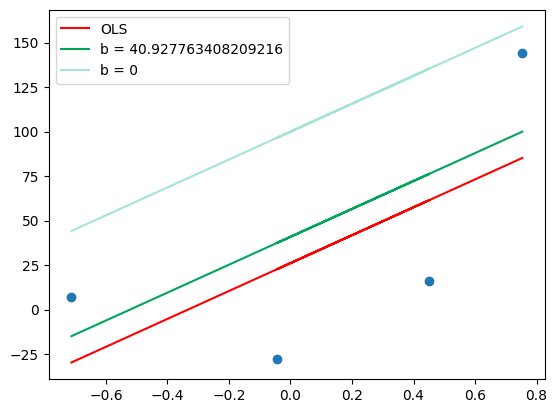

In [26]:
y_pred1 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [28]:
# iteraion 2
loss_slope= -2*np.sum(y-m*x.ravel()-b)
print("loss slope =",loss_slope)
step_size=loss_slope*lr
print("step size =",step_size)
b=b-step_size
print("new intercept b =",b)

loss slope = 23.62889463671634
step size = 2.362889463671634
new intercept b = 26.750426626179426


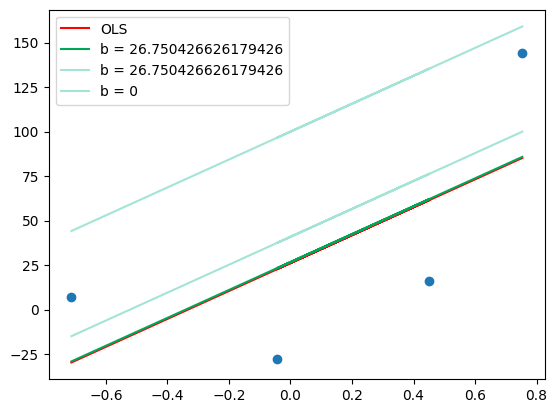

In [30]:
y_pred2=((78.35 * x) + b).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [31]:
# iteration 3
loss_slope= -2*np.sum(y-m*x.ravel()-b)
print("loss slope =",loss_slope)
step_size=loss_slope*lr
print("step size =",step_size)
b=b-step_size
print("new intercept b =",b)

loss slope = 4.725778927343242
step size = 0.47257789273432427
new intercept b = 26.2778487334451


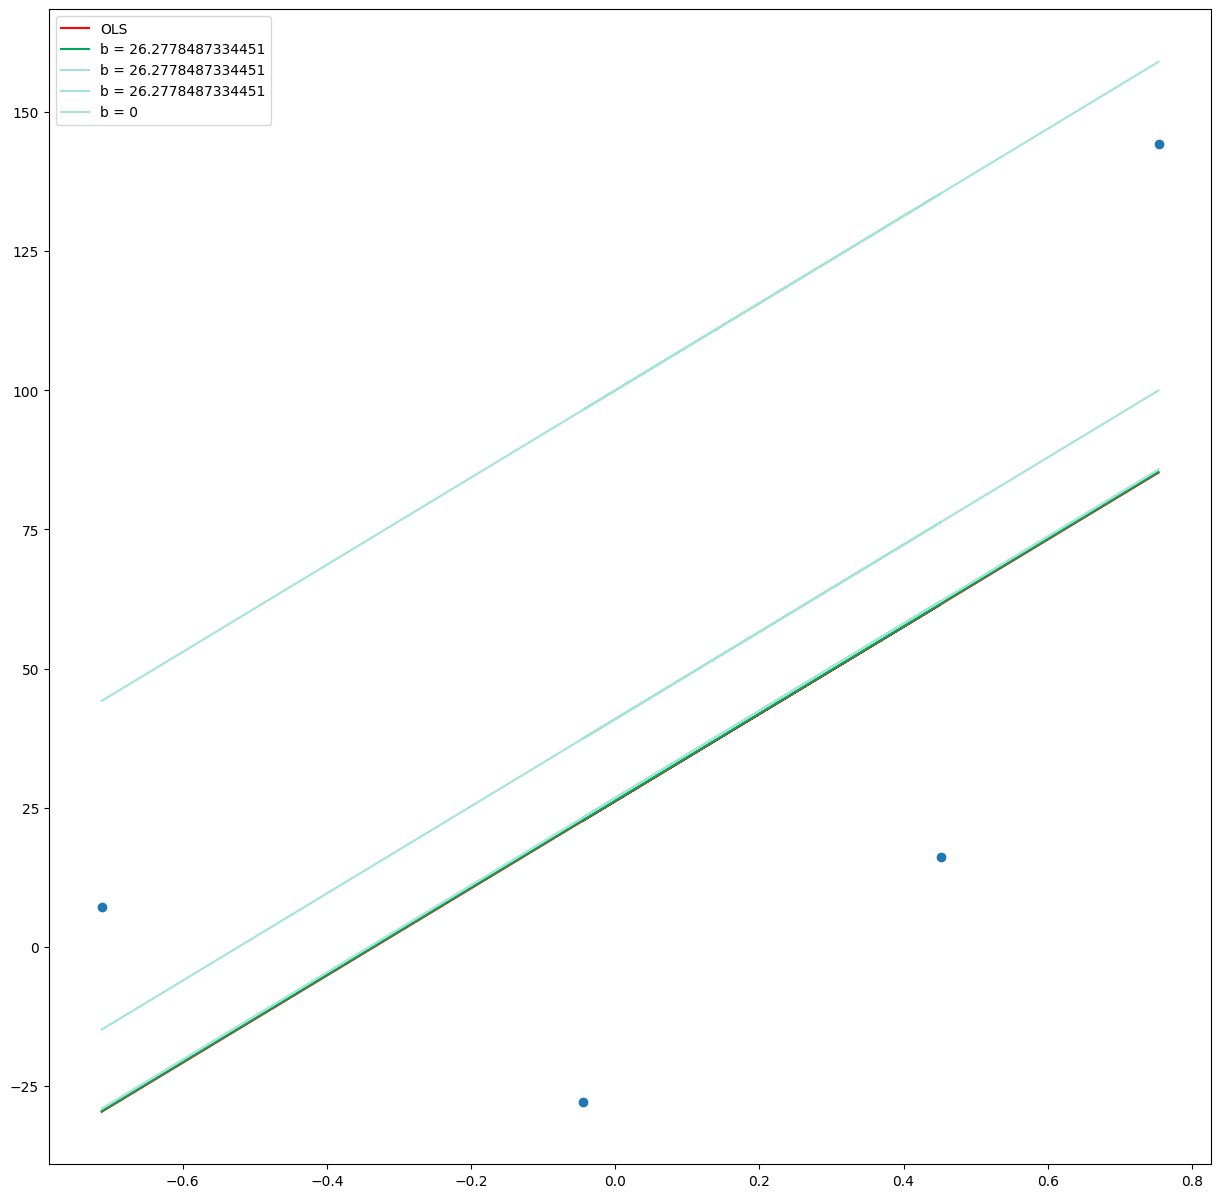

In [33]:

y_pred3 = ((78.35 * x) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

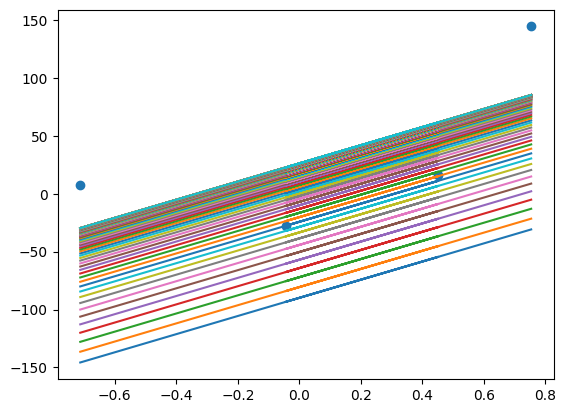

In [35]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*x.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * x + b

  plt.plot(x,y_pred)

plt.scatter(x,y)

In [84]:
# by create your own class
class GDRegressor:

  def __init__(self,learning_rate=0.01,epochs=100):
    self.lr=learning_rate
    self.epochs=epochs
    self.b=0
    self.m=1

  def fit(self,x,y):
    for i in range(self.epochs):
      # Ensure x is correctly handled as a 2D array for ravel
      # loss_slope_m= -2 * np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
      # The input x is likely 2D (n_samples, 1), so x[:,0] is better than x.ravel()
      loss_slope_m= -2 * np.sum((y - self.m*x[:,0] - self.b)*x[:,0])
      # loss_slope_b= -2 * np.sum(y - self.m*x.ravel() - self.b)
      loss_slope_b= -2 * np.sum(y - self.m*x[:,0] - self.b)
      self.m = self.m - (self.lr * loss_slope_m)
      self.b = self.b - (self.lr * loss_slope_b)

    print(self.m,self.b)

  def predict(self,x):
      # Ensure x is correctly handled as a 2D array for prediction
      # return self.m * x + self.b
      return self.m * x[:,0] + self.b

In [85]:
gd=GDRegressor(learning_rate=0.1,epochs=100)

In [81]:
reg.coef_

array([78.35063668])

In [82]:
reg.intercept_

np.float64(26.15963284313262)

In [92]:
# create your own class
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [93]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

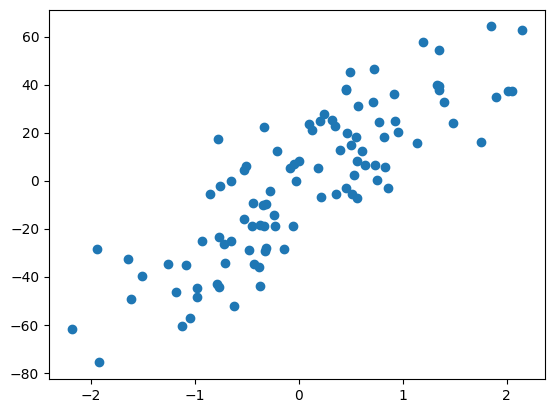

In [94]:
plt.scatter(X,y)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [99]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [100]:
class RGDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [101]:
gd =  RGDRegressor(0.001,50)

In [90]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [91]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579